<h2 style="color:blue" align="center">Handwritten digits classification using neural network</h2>

In this notebook we will classify handwritten digits using a simple neural network which has only input and output layers. We will than add a hidden layer and see how the performance of the model improves

In [30]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [31]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [32]:
len(X_train)

60000

In [33]:
len(X_test)

10000

In [34]:
X_train[0].shape

(28, 28)

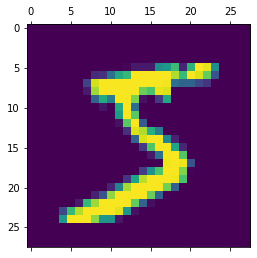

In [57]:
z=plt.matshow(X_train[0])
z

In [37]:
y_train[0]

5

In [38]:
X_train = X_train / 255
X_test = X_test / 255

In [40]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [41]:
X_train_flattened.shape

(60000, 784)

<h3 style='color:purple'>Very simple neural network with no hidden layers</h3>

In [60]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4673 - accuracy: 0.8774
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3037 - accuracy: 0.9146
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2834 - accuracy: 0.9200
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2729 - accuracy: 0.9238
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2667 - accuracy: 0.9250


In [44]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2677 - accuracy: 0.9271


[0.2677137553691864, 0.9271000027656555]

In [45]:
y_predicted = model.predict(X_test_flattened)
y_predicted[0]

313/313 [==============================] - 0s 1ms/step


array([2.13635303e-02, 2.62241372e-07, 5.88181727e-02, 9.53506768e-01,
       2.39962968e-03, 1.03051804e-01, 1.38007545e-06, 9.99812603e-01,
       8.72211680e-02, 7.10250318e-01], dtype=float32)

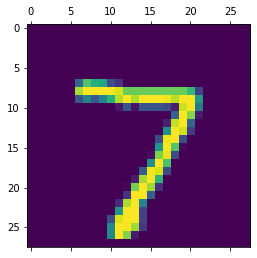

In [63]:
plt.matshow(X_test[0])

**np.argmax finds a maximum element  from an array and returns the index of it**

In [62]:
np.argmax(y_predicted[0])

7

In [ ]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [50]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 960,    0,    1,    1,    0,    5,    8,    4,    1,    0],
       [   0, 1111,    3,    2,    0,    1,    4,    2,   12,    0],
       [   9,    9,  921,   14,    8,    4,   13,   12,   38,    4],
       [   4,    0,   20,  911,    0,   27,    3,   12,   23,   10],
       [   1,    1,    4,    1,  906,    0,   14,    4,   10,   41],
       [   9,    3,    2,   22,    9,  785,   19,    7,   29,    7],
       [  10,    3,    3,    1,    7,    9,  921,    2,    2,    0],
       [   1,    5,   24,    2,    4,    0,    0,  962,    2,   28],
       [   7,    7,    7,   17,    9,   21,   10,   12,  877,    7],
       [  11,    7,    1,    7,   25,    7,    0,   27,    7,  917]])>

Text(69.0, 0.5, 'Truth')

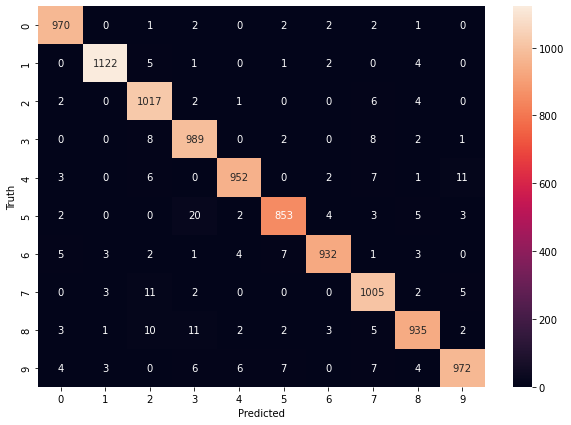

In [59]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

<h3 style='color:purple'>Using hidden layer</h3>

In [52]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2738 - accuracy: 0.9224
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1227 - accuracy: 0.9635
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0852 - accuracy: 0.9746
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0649 - accuracy: 0.9803
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0524 - accuracy: 0.9840


In [53]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0798 - accuracy: 0.9747


[0.07984443753957748, 0.9746999740600586]

313/313 [==============================] - 0s 1ms/step


Text(69.0, 0.5, 'Truth')

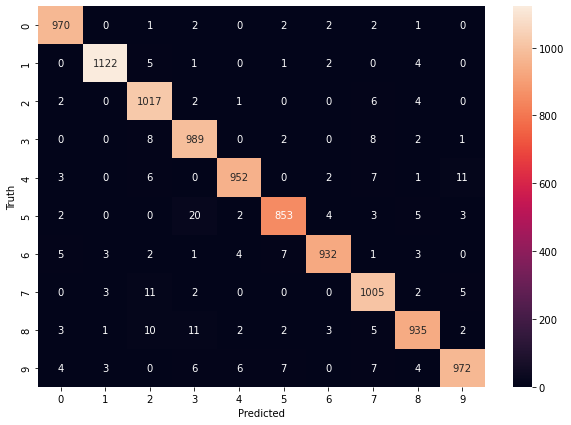

In [54]:
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')